# 4G dataset investigation [TODO]

Source:
- https://www.researchgate.net/publication/326027471_Beyond_throughput_a_4G_LTE_dataset_with_channel_and_context_metrics
- https://zenodo.org/record/1219679#.XrBi1pmxVEY
- https://www.ucc.ie/en/misl/research/datasets/ivid_4g_lte_dataset/


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 4G dataset analysis

In [2]:
# load PIMA indians diabetes dataset
dataset = pd.read_csv('4g/A_2017.11.30_16.48.26.csv')
#2017.11.30_16.48.26
dataset['Timestamp']= pd.to_datetime(dataset['Timestamp'], format='%Y.%m.%d_%H.%M.%S')
dataset = dataset.set_index(pd.DatetimeIndex(dataset['Timestamp']))

In [3]:
dataset

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance
Timestamp,,,,,,,,,,,,,,,,,,,,
2017-11-30 16:48:26,2017-11-30 16:48:26,-8.501373,51.893359,0,A,2,LTE,-102,-12,10.0,7,-85,3,7,D,-,-,-8.491719,51.893905,665.24000000000001
2017-11-30 16:48:26,2017-11-30 16:48:26,-8.501291,51.893462,1,A,2,LTE,-102,-12,10.0,7,-85,3,7,D,-,-,-8.491719,51.893905,658.67999999999995
2017-11-30 16:48:27,2017-11-30 16:48:27,-8.501291,51.893462,1,A,2,LTE,-102,-12,7.0,10,-87,310,14,D,-,-,-8.491719,51.893905,658.67999999999995
2017-11-30 16:48:28,2017-11-30 16:48:28,-8.501291,51.893462,1,A,2,LTE,-102,-12,7.0,7,-85,0,0,I,-,-,-8.491719,51.893905,658.67999999999995
2017-11-30 16:48:29,2017-11-30 16:48:29,-8.501291,51.893462,1,A,2,LTE,-102,-13,8.0,7,-85,0,0,I,-,-,-8.491719,51.893905,658.67999999999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-30 17:04:24,2017-11-30 17:04:24,-8.556712,51.892251,46,A,1,LTE,-91,-12,3.0,12,-72,7068,128,D,-89.0,-10.0,-8.535593,51.880268,1968.8299999999999
2017-11-30 17:04:25,2017-11-30 17:04:25,-8.556712,51.892251,46,A,1,LTE,-91,-12,3.0,10,-69,8992,166,D,-89.0,-10.0,-8.535593,51.880268,1968.8299999999999
2017-11-30 17:04:26,2017-11-30 17:04:26,-8.556712,51.892251,46,A,1,LTE,-86,-11,5.0,9,-76,9584,177,D,-85.0,-9.0,-8.535593,51.880268,1968.8299999999999


In [4]:
dataset.describe()

,Longitude,Latitude,Speed,CellID,RSRP,RSRQ,SNR,CQI,DL_bitrate,UL_bitrate
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,-8.519738,51.890417,25.730769,3.832967,-100.190110,-13.019780,5.203297,8.275824,13557.727473,264.167033
std,0.015037,0.001820,12.454142,2.459934,13.705536,4.054041,10.403170,3.264263,12322.598730,231.967257
min,-8.556712,51.888346,0.000000,0.000000,-128.000000,-22.000000,-13.000000,1.000000,0.000000,0.000000
25%,-8.532187,51.888904,14.000000,2.000000,-112.000000,-16.000000,-3.000000,6.000000,1747.250000,49.000000
50%,-8.515842,51.889068,29.000000,2.000000,-103.000000,-13.000000,3.000000,8.000000,10714.000000,217.500000
75%,-8.505477,51.892538,35.000000,6.000000,-89.000000,-10.000000,10.000000,10.000000,21573.500000,405.000000
max,-8.501291,51.893462,49.000000,8.000000,-63.000000,-4.000000,32.000000,15.000000,56646.000000,1163.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 910 entries, 2017-11-30 16:48:26 to 2017-11-30 17:04:27
Data columns (total 20 columns):
Timestamp               910 non-null datetime64[ns]
Longitude               910 non-null float64
Latitude                910 non-null float64
Speed                   910 non-null int64
Operatorname            910 non-null object
CellID                  910 non-null int64
NetworkMode             910 non-null object
RSRP                    910 non-null int64
RSRQ                    910 non-null int64
SNR                     910 non-null float64
CQI                     910 non-null int64
RSSI                    910 non-null object
DL_bitrate              910 non-null int64
UL_bitrate              910 non-null int64
State                   910 non-null object
NRxRSRP                 910 non-null object
NRxRSRQ                 910 non-null object
ServingCell_Lon         910 non-null object
ServingCell_Lat         910 non-null object
ServingCell_Distan

KPIs used:
- Timestamp: timestamp of sample
- Longitude and Latitude: GPS coordinates of mobile device
- Velocity: velocity in kph of mobile device
- Operatorname: cellular operator name (anonymised)
- CellId: Serving cell for mobile device
- NetworkMode: mobile communication standard (2G/3G/4G)
- RSRQ: RSRQ Represents a ratio between RSRP and Received Signal Strength Indicator (RSSI). Signal strength (signal quality) is measured across all resource elements (RE), including interference from all sources (dB).
- RSRP: RSRP Represents an average power over cell-specific reference symbols carried inside distinct RE. RSRP is used for measuring cell signal strength/coverage and therefore cell selection (dBm).
- RSSI: RSSI represents a received power (wideband) including a serving cell and interference and noise from other sources. RSRQ, RSRP and RSSI are used for measuring cell strength/coverage and therefore cell selection (handover) (dBm).
- SNR: value for signal-to-noise ratio (dB).
- CQI: CQI is a feedback provided by UE to eNodeB. It indicates data rate that could be transmitted over a channel (highest MCS with a BLER probability less than 10%), as the function of SINR and UE’s receiver characteristics. Based on UE’s prediction of the channel, eNodeB selects an appropriate modulation scheme and coding rate.
- DL_bitrate: download rate measured at the device (application layer) (kbit/s)
- UL_bitrate: uplink rate measured at the device (application layer) (kbit/s)
- State: state of the download process. It has two values, either I (idle, not downloading) or D (downloading)
- NRxRSRQ & NRxRSRP: RSRQ and RSRP values for the neighbouring cell.
- Cell_Longitude & Cell_Latitude: GPS coordinates of serving eNodeB. We use OpenCellid4, the largest community open database providing GPS coordinates of cell towers.
- Distance: distance between the serving cell and mobile device in metres.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000177FB8CC8D0>,
      dtype=object)

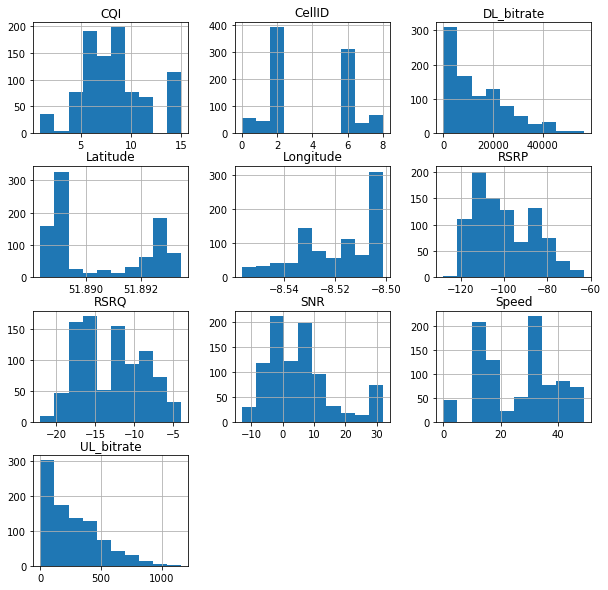

In [6]:
dataset.hist(bins = 10, figsize = (10,10))

In [7]:
# get number of values with 0 value
dataset.isin([0]).sum()

Timestamp                0
Longitude                0
Latitude                 0
Speed                    1
Operatorname             0
CellID                  57
NetworkMode              0
RSRP                     0
RSRQ                     0
SNR                     47
CQI                      0
RSSI                     0
DL_bitrate               9
UL_bitrate              10
State                    0
NRxRSRP                  0
NRxRSRQ                  0
ServingCell_Lon          0
ServingCell_Lat          0
ServingCell_Distance     0
dtype: int64

In [8]:
# get number of values with missing value
dataset.isna().sum()

Timestamp               0
Longitude               0
Latitude                0
Speed                   0
Operatorname            0
CellID                  0
NetworkMode             0
RSRP                    0
RSRQ                    0
SNR                     0
CQI                     0
RSSI                    0
DL_bitrate              0
UL_bitrate              0
State                   0
NRxRSRP                 0
NRxRSRQ                 0
ServingCell_Lon         0
ServingCell_Lat         0
ServingCell_Distance    0
dtype: int64

In [9]:
dataset['Operatorname'].unique()

array(['A'], dtype=object)

In [10]:
# Show not available values
dataset.isin(['-']).sum()

Timestamp                 0
Longitude                 0
Latitude                  0
Speed                     0
Operatorname              0
CellID                    0
NetworkMode               0
RSRP                      0
RSRQ                      0
SNR                       0
CQI                       0
RSSI                     88
DL_bitrate                0
UL_bitrate                0
State                     0
NRxRSRP                 280
NRxRSRQ                 280
ServingCell_Lon          11
ServingCell_Lat          11
ServingCell_Distance     11
dtype: int64

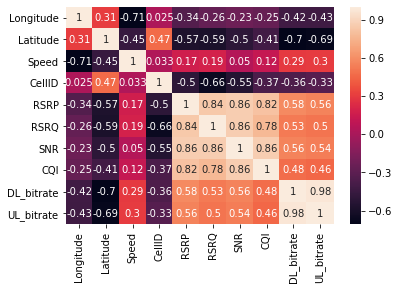

In [11]:
# show correlations
corr = dataset.corr()
import seaborn as sns
sns.heatmap(corr, annot = True)

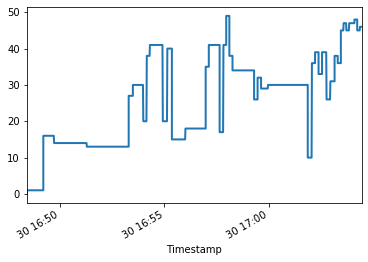

In [12]:
dataset['Speed'].plot(linewidth=2)

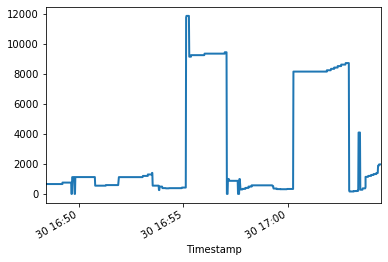

In [13]:
dataset['ServingCell_Distance'] = dataset['ServingCell_Distance'].replace(to_replace='-', value='0')
dataset['ServingCell_Distance'] = dataset['ServingCell_Distance'].astype(float)
dataset['ServingCell_Distance'].plot(linewidth=2)